# Error di Interpolasi Polynomial

Kita telah mempelajari interpolasi polynomial, interpolasi Lagrange, dan interpolasi Newton untuk mencari suatu fungsi yang menginterpolasi titik-titik data. Sekarang kita akan membahas tentang error di interpolasi polynomial.




Diberikan suatu fungsi $f(x)$ dan $x \in [a, b]$. Suatu himpunan titik $x_i \in X$, $i = 0, 1, \cdots, n$ dan $x_i \in [a, b]$. Misalkan $P_n(x)$ adalah polynomial berderajat $n$ yang menginterpolasi $f(x)$ pada $x_i$ 

$$ P_n(x_i) = f(x_i), \hspace{1em} i = 0, 1, \cdots, n. $$

Definisikan error 

$$ e(x) = f(x) - P_n(x) $$

:::{admonition} **Teorema: Error di Interpolasi Polynomial**
:name: teorema-error-interpolasi
:class: note

Terdapat suatu titik $\xi \in [a,b]$ sedemikian sehingga

$$ e(x) = \frac{1}{(n+1)!} f^{(n+1)} (\xi) \prod_{i=0}^{n} (x-x_i), \hspace{1em} \forall x \in [a,b].$$
:::

:::{admonition} **Bukti**
:name: full-proof
:class: tip
Jika $f \in \mathcal{P}_n$ maka $f(x) = P_n(x)$, trivial. Sekarang asumsikan $f \notin \mathcal{P}_n$. Untuk $x = x_i$, kita punya $e(x_i) = f(x_i) - P_n(x_i) = 0$, OK. Sekarang kita asumsikan terdapat $a$ sedemikian sehingga $a \neq x_i$. Kita definisikan 

$$ \label{4} W(x) = \prod_{i=0}^{n} (x - x_i) \in \mathcal{P}_{n+1}$$

dan konstanta

$$ c = \frac{f(a) - P_n(a)}{W(a)},$$

dan fungsi lain 

$$ \varphi(x) = f(x) - P_n(x) - cW(x).$$

Kita ingin mencari semua bernilai nol untuk fungsi $\varphi$:

$$ \varphi(x_i) = f(x_i) - P_n(x_i) - cW(x_i) = 0, \hspace{1em} i = 0, 1, \cdots, n $$

dan

$$ \varphi(a) = f(a) - P_n(a) - cW(a) = 0.$$

Jadi, $\varphi$ memiliki paling sedikit $(n+2)$ bernilai nol. Berdasarkan [](#rolle_umum) bahwa terdapat suatu bilangan $\xi \in (a,b)$ sehingga kita dapatkan

$$ \varphi^{(n+1)}(\xi) = f^{(n+1)}(\xi) - 0 - cW^{(n+1)}(\xi) = 0.$$

Dari [](#4) kita tahu bahwa

$$ W^{(n+1)} = (n + 1)!.$$

Sehingga kita dapatkan

$$f^{(n+1)}(\xi) = cW^{(n+1)}(\xi) = \frac{f(a) - P_n(a)}{W(a)}(n+1)!.$$

Kita ubah $a$ menjadi $x$, maka didapatkan

$$ e(x) = f(x) - P_n(x) = \frac{1}{(n+1)!} f^{(n+1)} (\xi) W(x) = \frac{1}{(n+1)!} f^{(n+1)} (\xi) \prod_{i=0}^{n} (x-x_i).$$
:::

## Titik yang seragam

Misalkan teradapat suatu selang $[a,b]$ dan kita ingin menyebar $(n+1)$ titik secara seragamd dengan

$$x_i = a + ih, \hspace{1em} i = 0, 1, \cdots, n$$

dimana $h = \frac{b-a}{n}$. Kita dapat mengukur error interpolasi di setiap titiknya jika diberikan $n$ dan berdasarkan

$$ \prod_{i=0}^{n} |x - x_i| \leq \frac{1}{4} h^{n+1} n!.$$

Maka errornya dapat diestimasi dengan

$$|e(x)| \leq \frac{1}{4(n+1)} |f^{(n+1)}(x)| h^{n+1} \leq \frac{M_{n+1}}{4(n+1)} h^{n+1} $$

dimana 

$$ M_{n+1} = \max_{x\in [a,b]} |f^{(n+1)}(x)|.$$

## Contoh 1

Misalkan kita ingin menginterpolasi $f(x) = \sin(\pi x)$ dengan suatu polynomial pada interval $[-1,1]$ dengan titik yang seragam. Tentukan batas atas dari error yang dihasilkan polynomial tersebut.

Ingin: mencari batas atas dari $|e(x)|$

$$|f^{(n+1)(x)}| \leq \pi^{n+1} $$

batas atas errornya

$$|e(x)| = |f(x) - P_n(x)| \leq \frac{\pi^{n+1}}{4(n+1)} \left( \frac{2}{n} \right)^{n+1}$$

## Kasus 1: Equally-distributed space

In [1]:
using Plots
using Polynomials

In [2]:
N = 50
x = range(0, 5, length=N)
y = sin.(x) + exp.(x).*cos.(x) ;

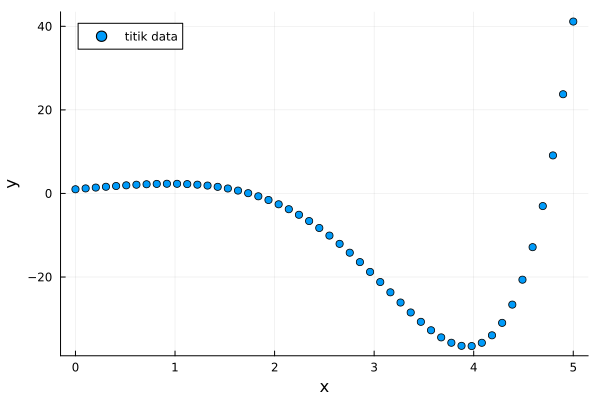

In [3]:
scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)

### Interpolasi Polynomial

In [4]:
V = [x[i]^j for i=1:length(x), j=0:length(x)-1]

50×50 Matrix{Float64}:
 1.0  0.0        0.0          0.0         …      0.0              0.0
 1.0  0.102041   0.0104123    0.00106248         2.63723e-48      2.69105e-49
 1.0  0.204082   0.0416493    0.00849986         7.42315e-34      1.51493e-34
 1.0  0.306122   0.093711     0.028687           2.10363e-25      6.43967e-26
 1.0  0.408163   0.166597     0.0679989          2.08943e-19      8.52829e-20
 1.0  0.510204   0.260308     0.13281     …      9.36933e-15      4.78027e-15
 1.0  0.612245   0.374844     0.229496           5.92118e-11      3.62521e-11
 1.0  0.714286   0.510204     0.364431           9.67953e-8       6.91395e-8
 1.0  0.816327   0.666389     0.543991           5.88122e-5       4.801e-5
 1.0  0.918367   0.843399     0.77455            0.0167799        0.0154101
 1.0  1.02041    1.04123      1.06248     …      2.63723          2.69105
 1.0  1.12245    1.25989      1.41416          255.857          287.186
 1.0  1.22449    1.49938      1.83597        16666.6          204

In [5]:
a = V \ y
a

50-element Vector{Float64}:
  1.0
  1.999999999990224
  2.57508048795129e-10
 -0.5000000027731824
 -0.16666665007069845
 -0.025000063088472725
  1.6430139088492184e-7
  0.0013885815663735189
  0.000397251141145597
  4.640194129922143e-5
  3.5607534477203236e-7
 -1.0448073536278427e-6
 -3.1892215683336615e-8
  ⋮
  1.0789137418519308e-25
 -5.809374351917977e-26
 -8.666970602779711e-27
  2.7429859991545997e-27
  1.9738412406248325e-30
  2.3162630412082794e-29
 -1.9578455788377545e-29
  3.4943033495069635e-30
 -5.5273213411189565e-31
  9.700864327021345e-32
 -9.885745795944042e-33
  3.851652948060012e-34

In [6]:
p = Polynomial(a)

Polynomial(1.0 + 1.999999999990224*x + 2.57508048795129e-10*x^2 - 0.5000000027731824*x^3 - 0.16666665007069845*x^4 - 0.025000063088472725*x^5 + 1.6430139088492184e-7*x^6 + 0.0013885815663735189*x^7 + 0.000397251141145597*x^8 + 4.640194129922143e-5*x^9 + 3.5607534477203236e-7*x^10 - 1.0448073536278427e-6*x^11 - 3.1892215683336615e-8*x^12 - 4.548101342138392e-8*x^13 + 8.682679382357345e-9*x^14 - 1.1926419917526742e-9*x^15 + 5.854431927227353e-11*x^16 + 1.1058565973570285e-11*x^17 + 7.815490890934054e-12*x^18 - 5.089696505066355e-12*x^19 + 1.1538923612580895e-12*x^20 - 4.156595278759301e-14*x^21 - 4.6612911165897886e-14*x^22 + 1.436514519365948e-14*x^23 - 1.84783842634143e-15*x^24 - 5.5146959259556954e-17*x^25 + 4.1274028966842584e-17*x^26 + 1.284926549318202e-18*x^27 + 8.022392075645039e-19*x^28 - 1.1763042608747287e-18*x^29 + 2.223202207294428e-19*x^30 - 3.0856468388825668e-21*x^31 + 1.0176298768106948e-21*x^32 - 8.372368047724554e-22*x^33 + 1.601188596952974e-23*x^34 + 1.13122611540849e-23*x^35 - 3.2134989523334294e-24*x^36 + 1.2146251782095543e-24*x^37 + 1.0789137418519308e-25*x^38 - 5.809374351917977e-26*x^39 - 8.666970602779711e-27*x^40 + 2.7429859991545997e-27*x^41 + 1.9738412406248325e-30*x^42 + 2.3162630412082794e-29*x^43 - 1.9578455788377545e-29*x^44 + 3.4943033495069635e-30*x^45 - 5.5273213411189565e-31*x^46 + 9.700864327021345e-32*x^47 - 9.885745795944042e-33*x^48 + 3.851652948060012e-34*x^49)

In [7]:
xx = range(0, 5, length=100)
yy = p.(xx)

100-element Vector{Float64}:
   1.0
   1.100944595265343
   1.2014872838743038
   1.3012013186894613
   1.3996319659186989
   1.4962955410580816
   1.5906784658444835
   1.682236354687466
   1.7703931398702912
   1.8545402456644515
   1.9340358223895502
   2.008204052369365
   2.076334540683742
   ⋮
 -23.508446399662752
 -20.298028186987352
 -16.638926046660075
 -12.503376151000737
  -7.863215768447071
  -2.6899912473930088
   3.0449209483324116
   9.370179412732636
  16.31432843546746
  23.905633358982037
  32.171899912530264
  41.140276787875166

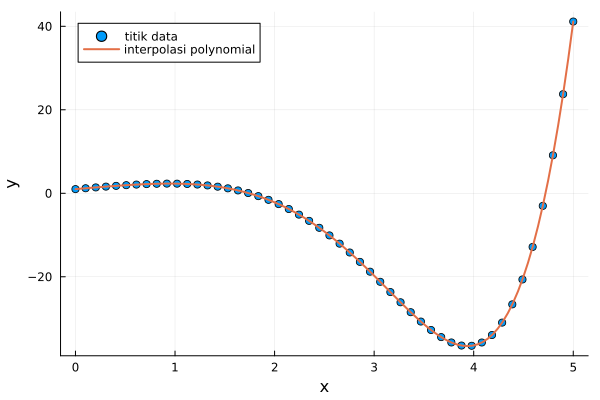

In [8]:
plot!(xx, yy, label="interpolasi polynomial", linewidth=2)

### Interpolasi Lagrange



In [9]:
function Lagrange_basis(x_data)
    n = length(x_data)
    L = zeros(n, n)
    for i in 1:n
        for j in 1:n
            if i == j
                L[i, j] = 1.0
            else 
                L[i, j] = 0.0
            end
        end
    end
    return L
end

Lagrange_basis (generic function with 1 method)

In [10]:
function poly_Lagrange(x, x_data, koef)
    n = length(x_data)
    hasil = 0.0
    for i in 1:n
        term = koef[i]
        for j in 1:n
            if i != j
                term *= (x - x_data[j]) / (x_data[i] - x_data[j])
            end
        end
        hasil += term
    end
    return hasil
end

poly_Lagrange (generic function with 1 method)

In [11]:
V = Lagrange_basis(x)
V

50×50 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [12]:
# Koefisien a
a = V \ y
a

50-element Vector{Float64}:
   1.0
   1.2035320455805993
   1.4036153959222686
   1.5963709352006463
   1.777421048528847
   1.9418597552333074
   2.0842262599918255
   2.1984835133307734
   2.278003636467683
   2.315562343493024
   2.3033447831165006
   2.2329655183857255
   2.0955056605457743
   ⋮
 -36.47494268457552
 -36.52899085483186
 -35.745956709638186
 -33.95694879969765
 -30.978083575928025
 -26.611304748922223
 -20.64571481315439
 -12.85950426610219
  -3.022569631379299
   9.100083867138263
  23.744055535977076
  41.14027678787525

In [13]:
p = poly_Lagrange

poly_Lagrange (generic function with 1 method)

In [14]:
xx = range(0, 5, length=100)
yy = [poly_Lagrange(xx[i], x, a) for i in 1:length(xx)]

100-element Vector{Float64}:
   1.0
   1.099953874794304
   1.2014877891773135
   1.3012327821806158
   1.3996321365044506
   1.4962946272510769
   1.590678529581614
   1.6822366557782558
   1.7703931417377805
   1.85454022923066
   1.9340358231909043
   2.008204051017055
   2.0763345405525993
   ⋮
 -23.50844639661059
 -20.298028188436575
 -16.63892598903038
 -12.50337617682485
  -7.8632156767696095
  -2.689991169938779
   3.044920919590001
   9.370179551518452
  16.314264858962723
  23.90562758513404
  32.17405024986573
  41.14027678787525

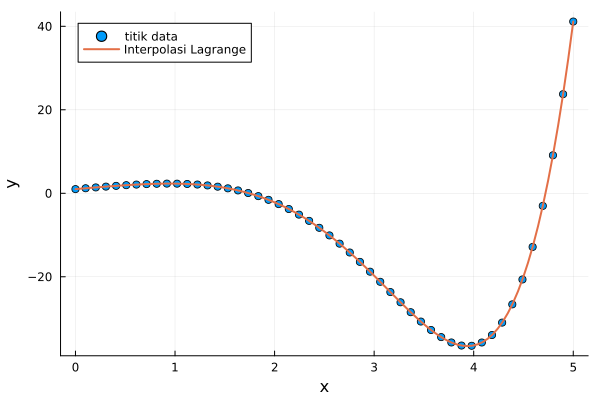

In [15]:
scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)
plot!(xx, yy, label="Interpolasi Lagrange", linewidth=2)

## Kasus 2: Non-equally-distributed Space

In [16]:
x = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
y = [1.3, 1.5, 1.85, 2.12, 2.6, 2.7, 2.4, 2.15, 2.05, 2.11, 2.25, 2.3, 2.26, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25];

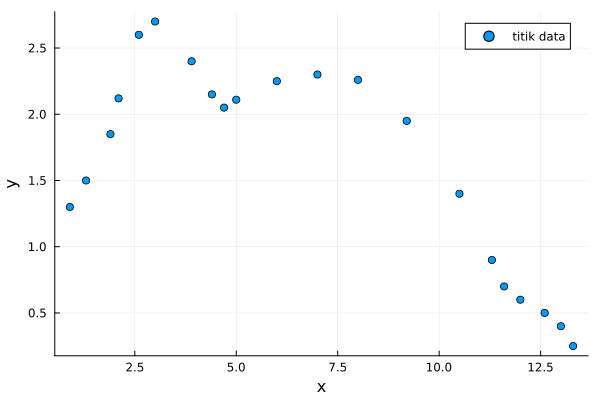

In [17]:
scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)

### Interpolasi polynomial

In [18]:
V = [x[i]^j for i=1:length(x), j=0:length(x)-1]

21×21 Matrix{Float64}:
 1.0   0.9    0.81     0.729      0.6561  …       0.135085      0.121577
 1.0   1.3    1.69     2.197      2.8561        146.192       190.05
 1.0   1.9    3.61     6.859     13.0321     197842.0           3.759e5
 1.0   2.1    4.41     9.261     19.4481          1.32485e6     2.78218e6
 1.0   2.6    6.76    17.576     45.6976          7.66467e7     1.99281e8
 1.0   3.0    9.0     27.0       81.0     …       1.16226e9     3.48678e9
 1.0   3.9   15.21    59.319    231.344           1.69913e11    6.62662e11
 1.0   4.4   19.36    85.184    374.81            1.68113e12    7.39696e12
 1.0   4.7   22.09   103.823    487.968           5.88653e12    2.76667e13
 1.0   5.0   25.0    125.0      625.0             1.90735e13    9.53674e13
 1.0   6.0   36.0    216.0     1296.0     …       6.0936e14     3.65616e15
 1.0   7.0   49.0    343.0     2401.0             1.13989e16    7.97923e16
 1.0   8.0   64.0    512.0     4096.0             1.44115e17    1.15292e18
 1.0   9.2   84.

In [19]:
a = V \ y
a

21-element Vector{Float64}:
  -48469.30620187156
  262495.9459529397
 -641099.9457621493
  941720.2865776637
 -935549.466270742
  669744.9578982332
 -359268.58243188105
  148175.5131876489
  -47813.54389018773
   12212.549236961178
   -2487.038321534474
     405.21266758365573
     -52.81562347623002
       5.4857905723684945
      -0.4503083566739462
       0.028805190937218485
      -0.0014041750866934262
       5.033874723178627e-5
      -1.2500599313623058e-6
       1.9195836092609337e-8
      -1.3723931394986858e-10

In [20]:
p = Polynomial(a)

Polynomial(-48469.30620187156 + 262495.9459529397*x - 641099.9457621493*x^2 + 941720.2865776637*x^3 - 935549.466270742*x^4 + 669744.9578982332*x^5 - 359268.58243188105*x^6 + 148175.5131876489*x^7 - 47813.54389018773*x^8 + 12212.549236961178*x^9 - 2487.038321534474*x^10 + 405.21266758365573*x^11 - 52.81562347623002*x^12 + 5.4857905723684945*x^13 - 0.4503083566739462*x^14 + 0.028805190937218485*x^15 - 0.0014041750866934262*x^16 + 5.033874723178627e-5*x^17 - 1.2500599313623058e-6*x^18 + 1.9195836092609337e-8*x^19 - 1.3723931394986858e-10*x^20)

In [21]:
xx = range(0, 14, length=1000)
yy = p.(xx)

1000-element Vector{Float64}:
 -48469.30620187156
 -44914.03549132829
 -41595.52273245728
 -38499.463006483194
 -35612.334648568976
 -32921.36044949612
 -30414.47059208241
 -28080.26725252658
 -25907.990799388772
 -23887.48752535436
 -22009.178849287877
 -20264.031928367025
 -18643.53162229495
      ⋮
  -8365.401947055327
  -9227.390673810052
 -10164.983505598737
 -11185.568895251075
 -12294.68768188219
 -13499.396755637039
 -14806.034861164524
 -16222.773988637753
 -17757.896086548528
 -19419.39201704354
 -21217.130095146647
 -23160.55029314554

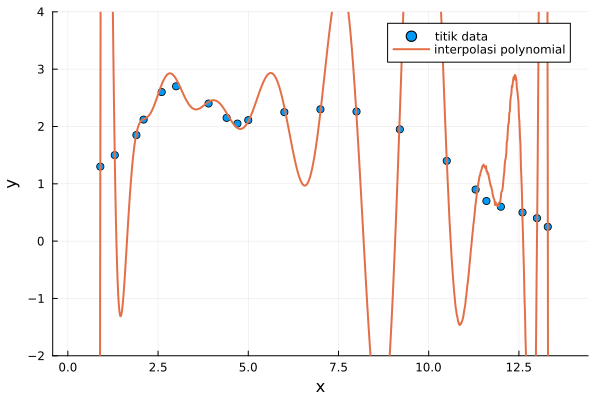

In [22]:
scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)
plot!(xx, yy, label="interpolasi polynomial", linewidth=2, ylimits=(-2,4))

### Interpolasi Lagrange

In [23]:
V = Lagrange_basis(x)
V

21×21 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [24]:
a = V \ y
a

21-element Vector{Float64}:
 1.3
 1.5
 1.85
 2.12
 2.6
 2.7
 2.4
 2.15
 2.05
 2.11
 2.25
 2.3
 2.26
 1.95
 1.4
 0.9
 0.7
 0.6
 0.5
 0.4
 0.25

In [25]:
p = poly_Lagrange

poly_Lagrange (generic function with 1 method)

In [26]:
xx = range(0, 14, length=1000)
yy = [poly_Lagrange(xx[i], x, a) for i in 1:length(xx)]

1000-element Vector{Float64}:
 -11655.271518215552
 -10800.485739614856
 -10002.646240506298
  -9258.308327474837
  -8564.216284129085
  -7917.293985195073
  -7314.635931652235
  -6753.498689907733
  -6231.292718612299
  -5745.574567327027
  -5294.0394318171875
  -4874.5140513158285
  -4484.949933637064
      ⋮
  -2552.3707824155686
  -2812.4772565245717
  -3095.39200854519
  -3402.8476607258763
  -3736.691464612678
  -4098.891932180555
  -4491.54580325999
  -4916.885364236394
  -5377.286133573324
  -5875.274930329575
  -6413.538342453747
  -6994.931612298096

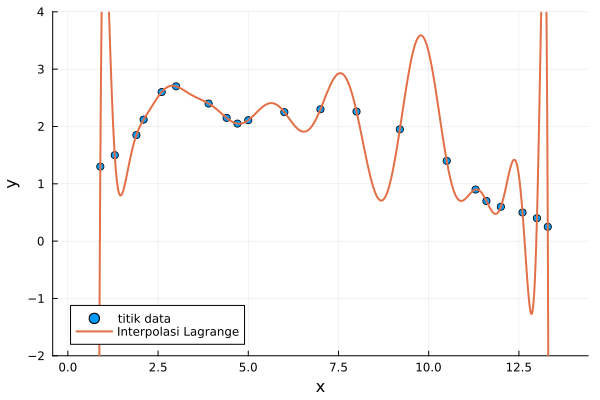

In [27]:
scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)
plot!(xx, yy, label="Interpolasi Lagrange", linewidth=2, ylimits=(-2,4))

Gejala ini disebut juga dengan [Runge phenomenon](https://en.wikipedia.org/wiki/Runge's_phenomenon).

## Contoh: Fungsi Runge

$$f(x) = \frac{1}{1+25x^2}$$

In [28]:
N = 100
x = [2*i/N - 1 for i=1:N]
y = 1 ./(1 .+ 25 .* x .^ 2);

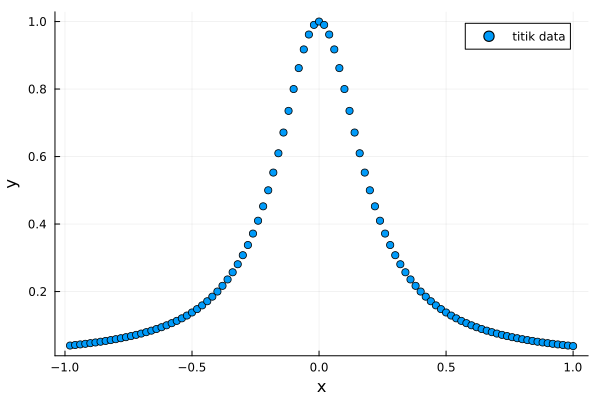

In [29]:
scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)

### Interpolasi polynomial

In [30]:
V = [x[i]^j for i=1:length(x), j=0:length(x)-1]
a = V \ y
p = Polynomial(a)

Polynomial(1.001308463455419 + 0.007521793001065275*x - 24.902637894700398*x^2 + 2.526893254944944*x^3 + 581.5487433736819*x^4 - 273.2700571073247*x^5 - 11174.904136859472*x^6 + 14138.533013366916*x^7 + 156779.79466710732*x^8 - 436110.3562320239*x^9 - 1.512313526447164e6*x^10 + 8.768100168714296e6*x^11 + 9.954701998987122e6*x^12 - 1.2168626510108744e8*x^13 - 4.9526272281427264e7*x^14 + 1.2143092495978878e9*x^15 + 2.6853812067139804e8*x^16 - 8.960518411112568e9*x^17 - 1.9199923114348698e9*x^18 + 4.973409092919155e10*x^19 + 1.2231032953071056e10*x^20 - 2.0908101557480228e11*x^21 - 5.352024314976392e10*x^22 + 6.634535624534517e11*x^23 + 1.4120003628825006e11*x^24 - 1.5636463072988208e12*x^25 - 1.3566263479097769e11*x^26 + 2.645006010624959e12*x^27 - 4.752469427483764e11*x^28 - 3.0186135734968774e12*x^29 + 2.2477197628688164e12*x^30 + 2.1552107804014985e12*x^31 - 4.444692923901951e12*x^32 - 1.341289636502892e12*x^33 + 4.640405649332141e12*x^34 + 2.194581799359012e12*x^35 - 2.078615834043799e12*x^36 - 3.1485582568824854e12*x^37 + 6.37096663036598e11*x^38 + 1.9508892437252905e12*x^39 - 3.1571449689219663e12*x^40 - 9.39336350517979e11*x^41 + 4.485704131672516e12*x^42 + 3.9552899009975507e11*x^43 + 3.5219984635834735e11*x^44 + 5.21617708090907e12*x^45 - 5.36001550861045e12*x^46 - 9.606415048058168e12*x^47 + 4.175364109150957e12*x^48 + 5.612050447452819e11*x^49 - 1.5723464205204778e12*x^50 + 7.101052607371432e12*x^51 + 1.0244405385384993e12*x^52 + 7.038018351096066e11*x^53 + 1.389266892400683e12*x^54 - 1.566737167989816e12*x^55 - 3.0354431154920757e12*x^56 - 7.544427262489204e12*x^57 - 1.162191215937051e12*x^58 + 3.119672597251068e12*x^59 + 4.747460804952341e12*x^60 + 1.4925190015990532e12*x^61 - 2.711827671733072e12*x^62 + 3.176545440135695e12*x^63 - 3.14156633497946e11*x^64 + 1.1327715740292126e12*x^65 + 3.440187556041971e12*x^66 - 3.3566553416380664e12*x^67 - 5.806213190813691e12*x^68 - 1.6504904791252883e12*x^69 + 4.664060463325133e12*x^70 + 5.624539595245952e11*x^71 - 3.435811143971498e12*x^72 - 1.4773366383641597e12*x^73 - 8.104781837830692e11*x^74 - 2.458294918346379e12*x^75 + 6.961149682177346e12*x^76 + 1.0620852931428639e13*x^77 - 1.0521384709991066e12*x^78 - 3.2429153919730923e12*x^79 - 8.6172962504423125e12*x^80 + 1.1053852137896533e12*x^81 + 8.493460271295304e12*x^82 - 8.158770942747845e12*x^83 - 6.2379410634572705e12*x^84 + 7.682299869787505e11*x^85 + 1.0129683421702814e12*x^86 + 2.5100036722387886e12*x^87 + 3.088832856947385e12*x^88 + 3.5340176872823906e12*x^89 + 4.037392888363345e12*x^90 + 2.4751125099930312e12*x^91 - 5.484750755124297e12*x^92 - 9.433495944008656e12*x^93 - 4.48707863974753e12*x^94 + 5.436180897895914e12*x^95 + 7.09958466242613e12*x^96 - 7.978950612885266e11*x^97 - 2.2164647557048647e12*x^98 - 4.856486299876811e10*x^99)

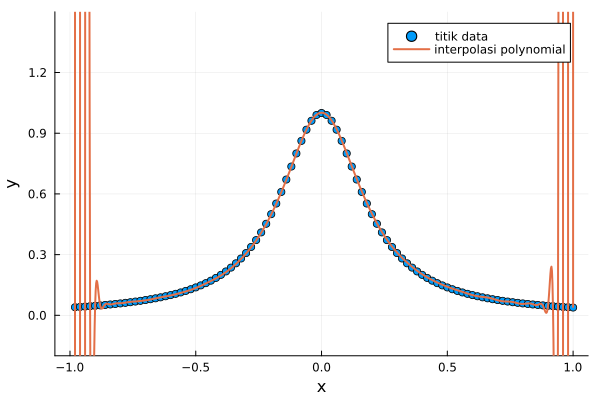

In [31]:
xx = range(-1, 1, length=1000)
yy = p.(xx)

scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)
plot!(xx, yy, label="interpolasi polynomial", linewidth=2, ylimits=(-0.2,1.5))

### Interpolasi Lagrange

In [32]:
V = Lagrange_basis(x)
a = V \ y
p = poly_Lagrange

poly_Lagrange (generic function with 1 method)

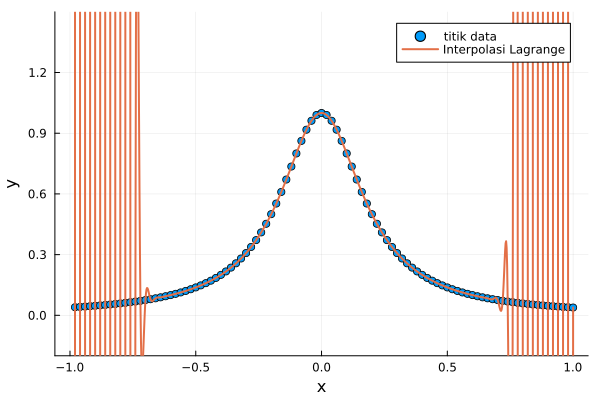

In [33]:
xx = range(-1, 1, length=1000)
yy = [poly_Lagrange(xx[i], x, a) for i in 1:length(xx)]
scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)
plot!(xx, yy, label="Interpolasi Lagrange", linewidth=2, ylimits=(-0.2,1.5))

## Lampiran

### Teorema nilai rataan

:::{admonition} **Teorema Nilai Rataan**
:class: note
:name: tnr

Jika $f$ adalah fungsi yang kontinu di selang $[a,b]$ dan f terdiferensialkan pada $(a,b)$, maka terdapat bilangan $c$ di selang $(a, b)$ (lihat [](#ilustrasi_mvt)) dengan

$$ f'(c) = \frac{f(b) - f(a)}{b - a}.$$

:::

:::{figure} ./images/mvt.png
:name: ilustrasi_mvt
:width: 500px
:align: center

Ilustrasi teorema nilai rataan.
:::


### Teorema Rolle

:::{admonition} **Teorema Rolle**
:class: note
:name: rolle

Misalkan $f$ kontinu di selang $[a,b]$ dan $f$ terdiferensialkan pada $(a,b)$. Jika $f(a) = f(b)$ maka terdapat bilangan $c$ di selang $(a,b)$ dengan $f'(c) = 0$. (lihat [](#ilustrasi_rolle))

:::

:::{figure} ./images/rolle.png
:name: ilustrasi_rolle
:width: 500px
:align: center

Ilustrasi teorema Rolle.
:::

### Teorema Rolle diperumum

:::{admonition} **Teorema Rolle Diperumum**
:name: rolle_umum
:class: note

Misalkan $f$ kontinu di selang $[a,b]$ dan $f$ terdiferensialkan $n$ kali pada $(a,b)$. Jika $f(x) = 0$ pada $(n+1)$ nilai berbeda $a \leq x_0 < x_1 < \cdots < x_n \leq b$ maka terdapat bilangan $c$ di selang $(x_0,x_n)$ dan juga di $(a,b)$ dengan $f^{(n)}(c) = 0$.

:::